In [2]:
"""
pythonÂÆûÁé∞ÁöÑ‰∏úÊñπË¥¢ÂØåÁΩëÁ´ôËÇ°Á•®Êï∞ÊçÆÁà¨Âèñ
‰ΩÜÂõ†‰∏∫ÂÆòÁΩëÊï∞ÊçÆÊòØÁî®JSÊ∏≤ÊüìÂá∫Êù•ÁöÑÔºåÊ≤°Ê≥ïÁõ¥Êé•Áà¨Âèñ

ÊàëÁî®ÁöÑÊñπÊ≥ïÊòØÂéªÂêéÂè∞Êü•jsonÊñá‰ª∂ÔºåÁÑ∂ÂêéÊâæÂà∞ÂåÖÂê´ËÇ°Á•®Êï∞ÊçÆÁöÑurlÈìæÊé•ÔºåÁÑ∂Âêé‰ΩøÁî®Ê≠£ÂàôÂåπÈÖçÂá∫Êï∞ÊçÆÁöÑ
ÔºàÊòØÁî®Êù•ËÆ≠ÁªÉÊ®°ÂûãÁöÑÔºâ

‰πüÂèØ‰ª•ËØïËØïÁî®seleniumÊù•ÂÆûÁé∞ÔºåÁúãÁúãËÉΩ‰∏çËÉΩËé∑ÂèñÂà∞Êï∞ÊçÆ
CialloÔΩû(‚à†„Éªœâ< )‚åí‚òÜ

"""

import re
import requests
import json
import pandas as pd

url = 'https://push2his.eastmoney.com/api/qt/stock/kline/get?cb=jQuery351016702133557143928_1757311398446&secid=1.000300&ut=fa5fd1943c7b386f172d6893dbfba10b&fields1=f1%2Cf2%2Cf3%2Cf4%2Cf5%2Cf6&fields2=f51%2Cf52%2Cf53%2Cf54%2Cf55%2Cf56%2Cf57%2Cf58%2Cf59%2Cf60%2Cf61&klt=101&fqt=1&beg=0&end=20500101&smplmt=460&lmt=1000000&_=1757311398447'

repsonse = requests.get(url)
text = repsonse.text


# Êï∞ÊçÆÁ§∫‰æã
"""
jQuery35109392514059566558_1756826314307({"rc":0,"rt":17,"svr":181669694,"lt":1,"full":0,"dlmkts":"","data":{"code":"000300","market":1,"name":"Ê≤™Ê∑±300","decimal":2,"dktotal":5021,"preKPrice":3941.42,"klines":["2025-03-12,3946.86,3927.23,3953.61,3921.47,156732190,309627267364.80,0.82,-0.36,-14.19,0.48","2025-03-13,3925.74,3911.58,3939.29,3897.38,
"""

# ÊèêÂèñ JSON Êï∞ÊçÆ // Âõ†‰∏∫ÂÜÖÈÉ®ÊúâÊã¨Âè∑ÔºåÊâÄ‰ª•Áî®Ê≠£ÂàôÂåπÈÖçÂÖàÂéªÈô§ÊéâÈáåÈù¢ÁöÑÊã¨Âè∑
match = re.search(r'\((\{.*\})\)', text)

json_str = match.group(1) # Ëé∑ÂèñÊã¨Âè∑‰∏≠ÁöÑÂÜÖÂÆπ
data = json.loads(json_str) # Â∞ÜÂ≠óÁ¨¶‰∏≤ËΩ¨‰∏∫Â≠óÂÖ∏

gupiao_name = data['data']['name']
gupiao_size = len(data['data']['klines'])

print(gupiao_name, gupiao_size)

# for line in data['data']['klines']:
#     print(line.split(','))

data = [line.split(',') for line in data['data']['klines']]

# pd.save_csv(f'{gupiao_name}-{gupiao_size}.csv', index=False)

data = pd.DataFrame(data)
data.head()


Ê≤™Ê∑±300 460


0        1        2        3        4         5               6   \
0  2005-01-04   994.77   982.79   994.77   980.66   7412868   4431977400.00   
1  2005-01-19   974.33   967.21   974.33   965.26   6338091   3427951300.00   
2  2005-02-03  1005.56   993.22  1014.19   992.16  16974539  10057310300.00   
3  2005-03-01  1039.35  1035.93  1042.74  1031.17   9962090   6288790700.00   
4  2005-03-16  1011.85  1003.07  1012.20   995.97  10622782   7153745900.00   

     7      8       9     10  
0  0.00   0.00    0.00  0.02  
1  0.93  -0.77   -7.48  0.02  
2  2.19  -1.36  -13.69  0.05  
3  1.11  -0.39   -4.06  0.03  
4  1.60  -1.03  -10.45  0.03

In [26]:
import numpy as np

raw_df = pd.read_csv(f"{gupiao_name}-460.csv")

# Êï∞ÊçÆÂàÜ‰∏∫Â§öË°åÊòæÁ§∫ÔºåÊØèË°åÂåÖÂê´‰∏çÂÆåÊï¥ÁöÑËÆ∞ÂΩïÔºåÈúÄË¶ÅÂêàÂπ∂‰∏§Ë°åÊâçËÉΩÂΩ¢ÊàêÂÆåÊï¥ÁöÑËÆ∞ÂΩï
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :]]) # ÂéªÈô§Êéâdate‰ªéÁ¨¨2ÂàóÂºÄÂßãÁöÑÈáçÂ§çÊï∞ÊçÆ
target = raw_df.values[::2, 2] # Ëé∑Âèñ‰ªé0ÂºÄÂßãÔºåÊØèÈöî2Ë°åÂèñÊï∞ÊçÆÔºåÂç≥Ëé∑ÂèñÁ¨¨1ÂàóÊï∞ÊçÆ

# Â∞ÜÊï∞ÊçÆÂàÜÂºÄÔºåÂàÜÂà´‰∏∫dataËÆ≠ÁªÉÈõÜÂíåtargetÊµãËØïÈõÜ
data.shape, target.shape


((115, 20), (115,))

In [27]:
"""
date: Êó•Êúü
open: ÂºÄÁõò‰ª∑
close: Êî∂Áõò‰ª∑
high: ÊúÄÈ´ò‰ª∑
low: ÊúÄ‰Ωé‰ª∑
volume: Êàê‰∫§Èáè
amount: Êàê‰∫§È¢ù
amplitude: ÊåØÂπÖ
change_pct: Ê∂®Ë∑åÂπÖ
change_val: Ê∂®Ë∑åÈ¢ù
turnover: Êç¢ÊâãÁéá
"""

import pandas as pd
import numpy as np

complete_data = np.column_stack([data, target])[:, :10] # ÊãºÊé•Êï∞ÊçÆÔºåÁî±‰∫éÊï∞ÊçÆÈáèËæÉÂ§ßÔºåÊâÄ‰ª•Âè™ÂèñÂâç10Âàó
columns = ["open", "close", "high", "low", "volume", "amount", "amplitude", "change_pct", "change_val", "turnover"]


df = pd.DataFrame(complete_data, columns=columns)
df


# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)
# df.to_csv(f'{gupiao_name}-{gupiao_size}.csv', index=False)


# data = pd.read_csv(f'{gupiao_name}-{gupiao_size}.csv')


open    close     high          low        volume  amount  amplitude  \
0     982.79   994.77   980.66    7412868.0  4.431977e+09    0.00       0.00   
1    1003.07  1012.20   995.97   10622782.0  7.153746e+09    1.60      -1.03   
2     868.46   871.77   855.59    9206929.0  4.777972e+09    1.87       0.59   
3     856.86   860.95   854.28   11816080.0  5.762385e+09    0.78      -0.33   
4     916.15   927.42   914.81   11547644.0  5.549882e+09    1.37      -0.77   
..       ...      ...      ...          ...           ...     ...        ...   
110  4024.28  4091.70  4002.50  335807938.0  6.391241e+11    2.21      -0.50   
111  3789.22  3810.74  3731.19  169166968.0  3.009657e+11    2.10      -0.18   
112  4010.17  4025.30  3989.51  144419428.0  2.860753e+11    0.89       0.06   
113  3860.11  3884.54  3849.04  109601207.0  2.088768e+11    0.91      -0.57   
114  4135.82  4146.12  4112.97  222759815.0  4.067929e+11    0.80       0.21   

     change_pct  change_val  turnover  
0          0.00        0.02    974.33  
1        -10.45        0.03    934.85  
2          5.12        0.03    848.54  
3         -2.83        0.04    926.97  
4         -7.12        0.04    903.27  
..          ...         ...       ...  
110      -20.29        1.03   3979.46  
111       -6.89        0.52   3829.05  
112        2.45        0.44   3843.42  
113      -22.16        0.34   3870.67  
114        8.66        0.68   4123.58  

[115 rows x 10 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        115 non-null    float64
 1   close       115 non-null    float64
 2   high        115 non-null    float64
 3   low         115 non-null    float64
 4   volume      115 non-null    float64
 5   amount      115 non-null    float64
 6   amplitude   115 non-null    float64
 7   change_pct  115 non-null    float64
 8   change_val  115 non-null    float64
 9   turnover    115 non-null    float64
dtypes: float64(10)
memory usage: 9.1 KB


In [29]:
df.describe()

open        close         high           low        volume  \
count   115.000000   115.000000   115.000000  1.150000e+02  1.150000e+02   
mean   3247.416696  3275.128870  3216.393739  1.076633e+08  1.538350e+11   
std    1077.657086  1086.133627  1068.129059  8.976957e+07  1.421453e+11   
min     856.860000   860.950000   854.280000  7.412868e+06  3.676845e+09   
25%    2539.665000  2555.220000  2508.520000  5.466053e+07  6.046827e+10   
50%    3366.710000  3390.010000  3339.550000  8.922628e+07  1.101328e+11   
75%    3965.345000  3965.695000  3917.975000  1.383883e+08  2.098876e+11   
max    5518.520000  5541.460000  5410.780000  4.903150e+08  6.853650e+11   

           amount   amplitude  change_pct  change_val     turnover  
count  115.000000  115.000000  115.000000  115.000000   115.000000  
mean     1.801652   -0.007565   -1.148435    0.329304  3258.150522  
std      1.298280    1.679152   52.717025    0.274717  1073.726396  
min      0.000000   -7.100000 -232.600000    0.020000   848.540000  
25%      0.930000   -0.570000  -18.220000    0.170000  2510.260000  
50%      1.400000   -0.070000   -1.980000    0.270000  3407.000000  
75%      2.085000    0.785000   23.005000    0.425000  3877.240000  
max      6.570000    6.680000  164.880000    1.500000  5695.130000

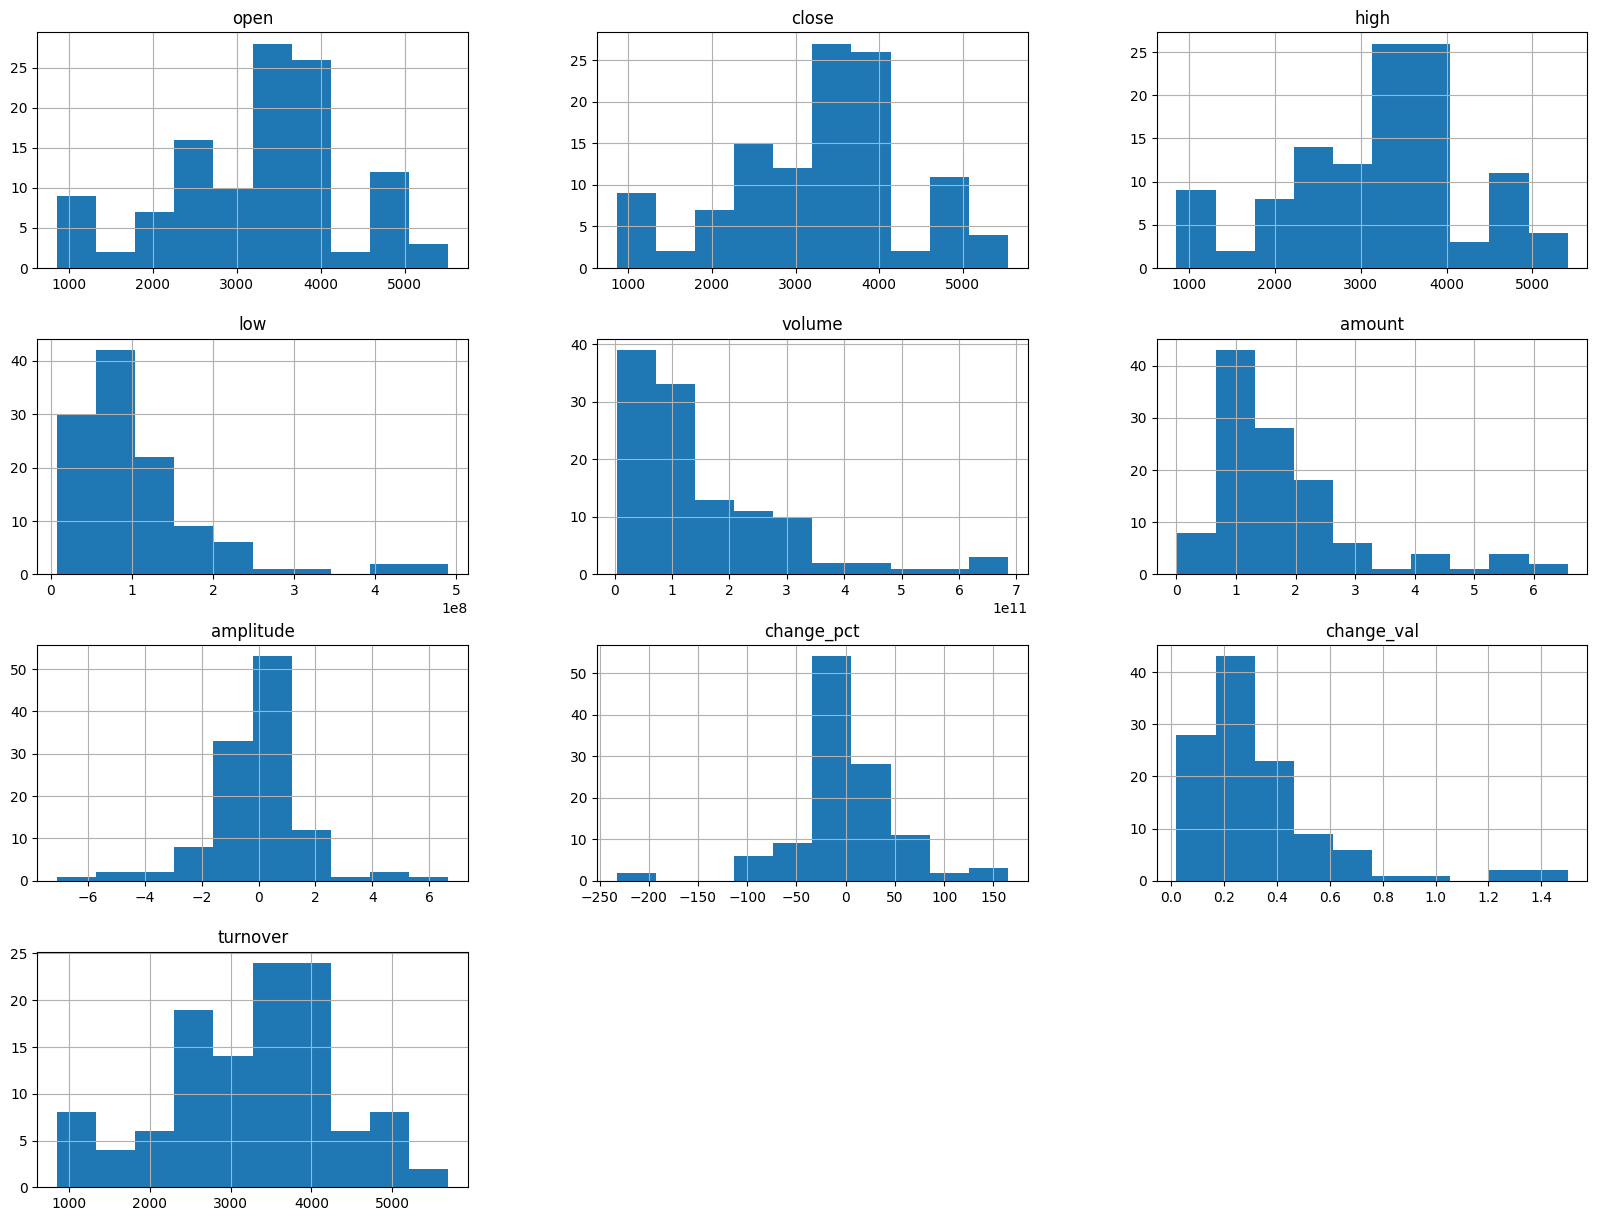

In [30]:
import matplotlib.pyplot as plt


df.hist(bins=10, figsize=(20, 15))
plt.show()

In [31]:
# ÁªòÂà∂ÂêÑ‰∏™ÁâπÂæÅÁöÑÊàø‰ª∑ÁöÑÂÖ≥Á≥ª
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [32]:
correlation_marix = df.corr() # corr() ÊòØ Pandas Â∫ì‰∏≠ÁöÑ‰∏Ä‰∏™ÂáΩÊï∞ÔºåÁî®‰∫éËÆ°ÁÆó DataFrame ‰∏≠ÊâÄÊúâÂàó‰πãÈó¥ÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞Áü©Èòµ„ÄÇÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÊòØ‰∏Ä‰∏™ÂØπÁß∞Áü©ÈòµÔºåÂÖ∂‰∏≠ÊØè‰∏™ÂÖÉÁ¥†Ë°®Á§∫‰∏§‰∏™ÂèòÈáè‰πãÈó¥ÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞„ÄÇÁõ∏ÂÖ≥Á≥ªÊï∞ÁöÑÂèñÂÄºËåÉÂõ¥‰∏∫ [-1, 1]ÔºåÂÖ∂‰∏≠ -1 Ë°®Á§∫ÂÆåÂÖ®Ë¥üÁõ∏ÂÖ≥Ôºå1 Ë°®Á§∫ÂÆåÂÖ®Ê≠£Áõ∏ÂÖ≥Ôºå0 Ë°®Á§∫‰∏çÁõ∏ÂÖ≥„ÄÇ

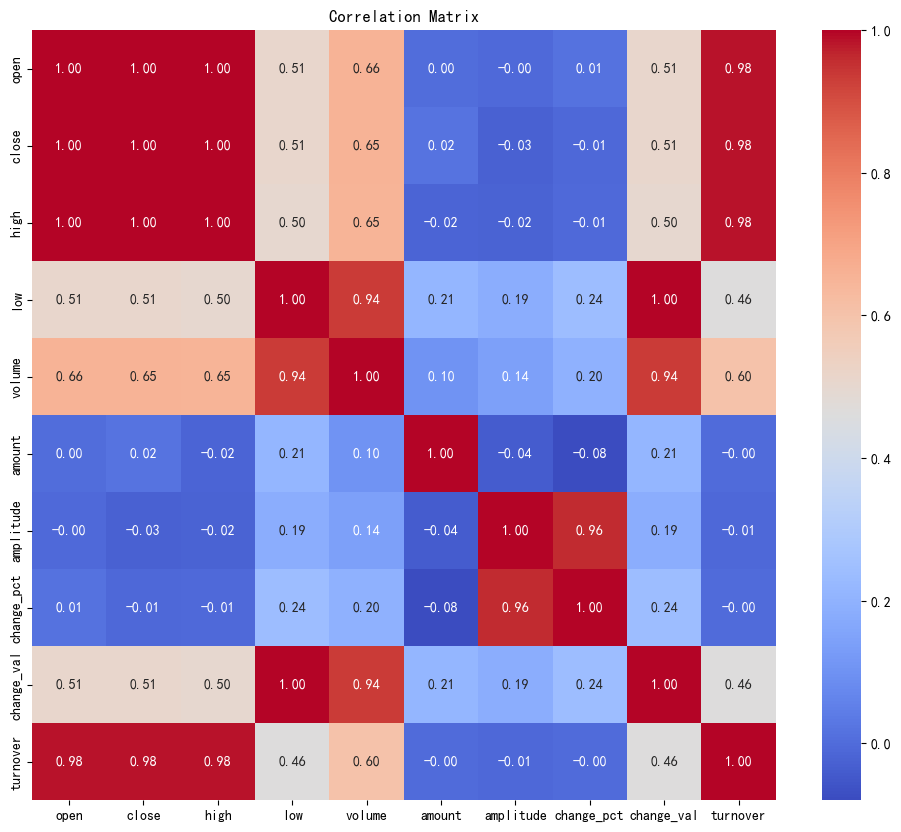

In [33]:
# ÂèØËßÜÂåñÁõ∏ÂÖ≥Áü©Èòµ
plt.figure(figsize=(12, 10)) # ËÆæÁΩÆÂõæÁâáÂ§ßÂ∞è
sns.heatmap(correlation_marix, annot=True, fmt=".2f", cmap="coolwarm") # ËØ¥ÊòéÔºöannot=TrueË°®Á§∫Âú®ÊØè‰∏™ÂçïÂÖÉÊ†º‰∏≠ÊòæÁ§∫Êï∞ÂÄºÔºåfmt=".2f"Ë°®Á§∫‰øùÁïô‰∏§‰ΩçÂ∞èÊï∞Ôºåcmap="coolwarm"Ë°®Á§∫È¢úËâ≤Êò†Â∞Ñ
plt.title("Correlation Matrix") # Ê†áÈ¢ò
plt.show() # ÊòæÁ§∫ÂõæÁâá


In [34]:
from sklearn.linear_model import LinearRegression # Á∫øÊÄßÂõûÂΩíÊ®°Âûã
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./Ê≤™Ê∑±300-460_date.csv')
# Â∞ÜÊó•ÊúüËΩ¨Êç¢‰∏∫Êó∂Èó¥Êà≥
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(pd.Timestamp.toordinal)

X = df.drop(columns='close', axis=1)
y = df['close']
print(X)
print(y)

# ÂàõÂª∫Á∫øÊÄßÂõûÂΩíÊ®°Âûã
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # ÈöèÊú∫ÁßçÂ≠ê // ‰øùËØÅÊØèÊ¨°ËøêË°åÁªìÊûú‰∏ÄËá¥

model.fit(X_train, y_train) # ËÆ≠ÁªÉÊ®°Âûã
print(f'ÊùÉÈáçw0Ôºö{model.intercept_}') # Êà™Ë∑ù
print(f'Á≥ªÊï∞w1Ôºö{model.coef_}') # Á≥ªÊï∞

# Ê®°ÂûãÈ¢ÑÊµãÔºå‰º†ÂÖ•ÊµãËØïÈõÜ
y_pred = model.predict(X_test) # È¢ÑÊµãÁªìÊûú
print(f'È¢ÑÊµãÁªìÊûúÔºö{y_pred}')
mse = mean_squared_error(y_test, y_pred)
print(f'ÂùáÊñπËØØÂ∑ÆMSEÔºö{mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2Á≥ªÊï∞Ôºö{r2}')


       date     open     high      low     volume        amount  amplitude  \
0    731950   994.77   994.77   980.66    7412868  4.431977e+09       0.00   
1    731965   974.33   974.33   965.26    6338091  3.427951e+09       0.93   
2    731980  1005.56  1014.19   992.16   16974539  1.005731e+10       2.19   
3    732006  1039.35  1042.74  1031.17    9962090  6.288791e+09       1.11   
4    732021  1011.85  1012.20   995.97   10622782  7.153746e+09       1.60   
..      ...      ...      ...      ...        ...           ...        ...   
455  739442  3993.42  4032.98  3992.52  209778904  3.478367e+11       1.01   
456  739457  4145.32  4150.50  4117.80  273594963  4.304455e+11       0.79   
457  739474  4110.29  4134.25  4103.61  190443716  3.606858e+11       0.75   
458  739489  4453.35  4476.80  4435.53  270621395  6.279505e+11       0.92   
459  739502  4467.17  4482.76  4438.07  213298875  5.799364e+11       1.00   

     change_pct  change_val  turnover  
0          0.00        

In [35]:
y_test, y_pred

(124    2850.83
 30     1317.65
 199    2303.48
 439    3957.78
 154    2477.69
         ...   
 299    3531.11
 46     2298.00
 101    3667.56
 415    3736.65
 157    2504.32
 Name: close, Length: 92, dtype: float64,
 array([2845.35357832, 1317.92153915, 2310.88210542, 3947.02870216,
        2478.38580487, 3526.76457135, 4097.1883211 , 3860.46938553,
        3633.14928031, 3690.97818044, 3851.61570932, 3998.07885838,
        2977.08421268, 4056.69045756, 3176.21310519, 3464.02040141,
        2165.95915445, 3098.66153155, 3898.97680195,  989.28176215,
        4631.76824177, 3352.41224573, 3299.5610373 , 1430.36218164,
        2167.10081103, 3402.15766724, 3751.40231321, 2090.50023765,
        2983.01099189,  906.6769567 , 3560.21417714, 5220.34427914,
        3955.39588233, 3850.23458939, 4616.74805442, 3837.54017958,
        3824.72790723, 3189.20538734, 2790.12201624, 3834.14870626,
        3663.39984454, 4171.41027739, 2366.01862674, 2879.41073133,
        3381.80248504, 3179.559690

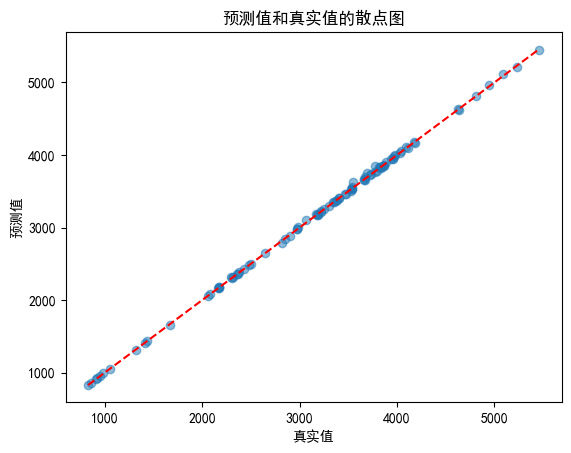

In [36]:
plt.scatter(y_test, y_pred, alpha=0.5) # ÁªòÂà∂È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÁöÑÊï£ÁÇπÂõæ // y_test Ë°®Á§∫ÁúüÂÆûÂÄº, y_pred Ë°®Á§∫È¢ÑÊµãÂÄº
plt.xlabel("ÁúüÂÆûÂÄº") # Ê∑ªÂä† x ËΩ¥Ê†áÁ≠æ
plt.ylabel("È¢ÑÊµãÂÄº") # Ê∑ªÂä† y ËΩ¥Ê†áÁ≠æ
plt.title("È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÁöÑÊï£ÁÇπÂõæ") # Ê∑ªÂä†Ê†áÈ¢ò
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') # ÁªòÂà∂ÂØπËßíÁ∫ø
plt.show() # ÊòæÁ§∫ÂõæÂÉè

ÊàëÂ§ßÊ¶ÇÁúãÊòéÁôΩ‰∫ÜÔºå‰Ω†Áé∞Âú®ÊòØÊãø‰∏Ä‰∏™ËÇ°Á•®Êï∞ÊçÆË°®ÔºàÊ≤™Ê∑±300ÔºâÂÅöÁ∫øÊÄßÂõûÂΩíÔºåÁî®Êó•Êúü„ÄÅÂºÄÁõò‰ª∑„ÄÅÈ´ò‰ΩéÁÇπ„ÄÅÊàê‰∫§ÈáèËøô‰∫õÂΩìÁâπÂæÅÔºåÈ¢ÑÊµãÊî∂Áõò‰ª∑ÂØπÂêßÔºü

‰Ω†Ë∑ëÂá∫Êù•ÁöÑÁªìÊûúÈáåÔºö

* **MSE Âè™Êúâ 331**ÔºàÁõ∏ÂØπÂá†ÂçÉÁÇπÁöÑÊî∂Áõò‰ª∑Êù•ËØ¥ÔºåËØØÂ∑ÆÁâπÂà´Â∞èÔºâ
* **R¬≤ Á≥ªÊï∞ 0.9997**ÔºàÂá†‰πéÂÆåÁæéÊãüÂêàÔºâ

ËøôÂü∫Êú¨‰∏äËØ¥Êòé \*\*Á∫øÊÄßÂõûÂΩíÂ∑≤Áªè‚ÄúËøáÊãüÂêà‚Äù\*\*‰∫Ü„ÄÇ‰∏∫‰ªÄ‰πàÔºü

Âõ†‰∏∫‰Ω†Âú®ËÆ≠ÁªÉÁöÑÊó∂ÂÄôÔºåÁî®‰∫ÜÂæàÂ§öÂíåÊî∂Áõò‰ª∑È´òÂ∫¶Áõ∏ÂÖ≥ÁöÑÁâπÂæÅÔºàÊØîÂ¶ÇÂΩìÂ§©ÁöÑÂºÄÁõò‰ª∑„ÄÅÈ´òÁÇπ„ÄÅ‰ΩéÁÇπÔºåÂá†‰πéÂíåÊî∂Áõò‰ª∑ÊòØÂº∫Áõ∏ÂÖ≥ÁöÑÔºâ„ÄÇÊ®°ÂûãÁõ∏ÂΩì‰∫é‚ÄúÁúãÁ≠îÊ°àÊäÑÁ≠îÊ°à‚ÄùÔºåÂΩìÁÑ∂ÊãüÂêàÂæóÁâπÂà´Â•ΩÔºå‰ΩÜÂÆûÈôÖ‰∏äÂ¶ÇÊûú‰Ω†Ë¶ÅÈ¢ÑÊµãÊú™Êù•ÁöÑÊï∞ÊçÆÔºàÁúüÊ≠£Êú™Áü•ÁöÑÊî∂Áõò‰ª∑ÔºâÔºåÂÆÉÂ∞±‰∏ç‰∏ÄÂÆöËÉΩ‰øùÊåÅËøô‰πàÈ´òÁöÑÂáÜÁ°ÆÂ∫¶„ÄÇ

---

Ë¶ÅËøõ‰∏ÄÊ≠•Â≠¶‰π†/ÊîπËøõÔºåÂèØ‰ª•ÊúâÂá†‰∏™ÊñπÂêëÔºö

1. **‰∏•Ê†ºÂàíÂàÜÊó∂Èó¥È°∫Â∫è**

   * ‰∏çËÉΩÈöèÊú∫Êâì‰π±ÊãÜÂàÜÔºàtrain\_test\_split ‰ºöÊâì‰π±ÔºâÔºåËøôÊ†∑ÊµãËØïÈõÜÂèØËÉΩÂåÖÂê´ÊØîËÆ≠ÁªÉÈõÜËøòÊó©ÁöÑÊï∞ÊçÆ„ÄÇ
   * ËÇ°Á•®È¢ÑÊµãÂøÖÈ°ªÁî®„ÄåËøáÂéª ‚Üí Êú™Êù•„ÄçÁöÑÊñπÂºèÔºåÊØîÂ¶ÇÂâç 80% Êï∞ÊçÆÂÅöËÆ≠ÁªÉÔºåÂêé 20% Êï∞ÊçÆÂÅöÊµãËØï„ÄÇ

   ```python
   train_size = int(len(df) * 0.8)
   X_train, X_test = X[:train_size], X[train_size:]
   y_train, y_test = y[:train_size], y[train_size:]
   ```

2. **ÂáèÂ∞ë‚ÄúÊ≥ÑÊºèÁâπÂæÅ‚Äù**

   * Â¶ÇÊûú‰Ω†ÊÉ≥È¢ÑÊµãÊòéÂ§©ÁöÑÊî∂Áõò‰ª∑Ôºå‰∏çËÉΩÁî®ÂΩìÂ§©ÁöÑ„ÄåÂºÄÁõò‰ª∑„ÄÅÈ´òÁÇπ„ÄÅ‰ΩéÁÇπ„ÄçÂéªÈ¢ÑÊµãÔºåÂõ†‰∏∫Ëøô‰∫õÊï∞Êú¨Êù•Â∞±ÊòØÂΩìÂ§©Êî∂Áõò‰ª∑ÁöÑÂáΩÊï∞„ÄÇ
   * Êõ¥ÂêàÁêÜÁöÑÊñπÊ≥ïÊòØÂè™Áî®„ÄåËøáÂéªÁöÑÊî∂Áõò‰ª∑„ÄÅÊàê‰∫§Èáè„ÄÅÊ∂®Ë∑åÂπÖÁ≠âÊªûÂêéÁâπÂæÅ„ÄçÊù•È¢ÑÊµã„ÄÇ
   * ‰∏æ‰∏™‰æãÂ≠êÔºåÂèØ‰ª•ÊûÑÈÄ† `close(t-1), close(t-2), ...` ‰Ωú‰∏∫ÁâπÂæÅÔºåÈ¢ÑÊµã `close(t)`„ÄÇ

3. **Â∞ùËØïÈùûÁ∫øÊÄßÊ®°Âûã**

   * ËÇ°Á•®ËøôÁßçÊï∞ÊçÆÂæÄÂæÄ‰∏çÊòØÁ∫øÊÄßÁöÑÔºåÂèØ‰ª•ËØïËØïÔºö

     * `RandomForestRegressor`
     * `GradientBoostingRegressor`
     * `XGBoost`
     * ÊàñËÄÖÁÆÄÂçïÁöÑÁ•ûÁªèÁΩëÁªúÔºàMLPÔºâ

4. **Â∞ùËØïÊó∂Èó¥Â∫èÂàóÊñπÊ≥ï**

   * ARIMA„ÄÅProphet
   * LSTM„ÄÅGRU ËøôÁ±ªÂæ™ÁéØÁ•ûÁªèÁΩëÁªú

---

ÊàëÁåú‰Ω†Áé∞Âú®ÁöÑÁñëÈóÆÊòØÔºö**Â¶ÇÊûúÊàëÊÉ≥Áî®Á•ûÁªèÁΩëÁªúÊõøÊç¢ÊéâËøô‰∏™Á∫øÊÄßÂõûÂΩíÔºåÊòØ‰∏çÊòØÂè™Ë¶ÅÊää `LinearRegression()` Êç¢Êàê `MLPRegressor()` Â∞±Ë°åÔºü**

Á≠îÊ°àÊòØÔºöÂá†‰πéÂèØ‰ª•„ÄÇÂè™Ë¶ÅÊ≥®ÊÑèËæìÂÖ•Êï∞ÊçÆË¶ÅÊ†áÂáÜÂåñÔºàÁ•ûÁªèÁΩëÁªúËÆ≠ÁªÉÂØπÊï∞ÂÄºÂ§ßÂ∞èÊïèÊÑüÔºâ„ÄÇ

Ë¶Å‰∏çË¶ÅÊàëÂ∏Æ‰Ω†Áõ¥Êé•Êää‰Ω†Ëøô‰ªΩ `LinearRegression` ÁöÑ‰ª£Á†ÅÊîπÊàê **MLP Á•ûÁªèÁΩëÁªú**ÁöÑÁâàÊú¨Ôºü


In [4]:
"""
ËøôÈáåÂÅö‰∫ÜÂá†‰∏™ÂÖ≥ÈîÆÊîπÂä®Ôºö
Êï∞ÊçÆÊ†áÂáÜÂåñÔºöÁ•ûÁªèÁΩëÁªúÂøÖÈ°ªÂÅöÔºåÂê¶ÂàôÊï∞ÂÄºÂ∑ÆÂºÇÂ§™Â§ßÔºåËÆ≠ÁªÉ‰ºöÂæàÊÖ¢ÁîöËá≥‰∏çÊî∂Êïõ„ÄÇ
Êó∂Èó¥Â∫èÂàóÂàáÂàÜÔºöÁî®Ââç 80% Êï∞ÊçÆËÆ≠ÁªÉÔºåÂêé 20% ÊµãËØïÔºåÊõ¥Á¨¶ÂêàËÇ°Á•®È¢ÑÊµãÈÄªËæë„ÄÇ
MLP Ê®°ÂûãÁªìÊûÑÔºö‰∏§Â±ÇÈöêËóèÂ±ÇÔºåÂàÜÂà´ 64„ÄÅ32 ‰∏™Á•ûÁªèÂÖÉÔºåÂèØ‰ª•Ëá™Â∑±Ë∞ÉÊï¥„ÄÇ
ËÆ≠ÁªÉÂèÇÊï∞Ôºömax_iter=500 ‰øùËØÅËÉΩÊî∂ÊïõÔºåÂ≠¶‰π†Áéá‰πüÂèØ‰ª•Â∞ùËØïË∞ÉÂ∞èÊàñË∞ÉÂ§ß„ÄÇ
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv('./Ê≤™Ê∑±300-460_date.csv')

# Â∞ÜÊó•ÊúüËΩ¨‰∏∫Êó∂Èó¥Êà≥Êï∞ÂÄº
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(pd.Timestamp.toordinal)

# ÁâπÂæÅÂíåÁõÆÊ†á
X = df.drop(columns='close', axis=1)
y = df['close']

# Êï∞ÊçÆÊ†áÂáÜÂåñÔºàÁ•ûÁªèÁΩëÁªúÂæàÊïèÊÑüÔºå‰∏ÄÂÆöË¶ÅÂÅöÔºâ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÊåâÊó∂Èó¥È°∫Â∫èÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜÔºàÈÅøÂÖçÊú™Êù•Êï∞ÊçÆÊ≥ÑÊºèÂà∞ËÆ≠ÁªÉ‰∏≠Ôºâ
train_size = int(len(df) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ÂÆö‰πâ MLP Á•ûÁªèÁΩëÁªú
model = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # ‰∏§Â±ÇÈöêËóèÂ±ÇÔºå64 Âíå 32 ‰∏™Á•ûÁªèÂÖÉ
    activation='relu',            # ÊøÄÊ¥ªÂáΩÊï∞ ReLU
    solver='adam',                # ‰ºòÂåñÂô® Adam
    learning_rate_init=0.001,     # Â≠¶‰π†Áéá
    max_iter=500,                 # ÊúÄÂ§ßËø≠‰ª£Ê¨°Êï∞
    random_state=42
    ,verbose=True
)

# ËÆ≠ÁªÉÊ®°Âûã
model.fit(X_train, y_train)

# È¢ÑÊµã
y_pred = model.predict(X_test)

# ËØÑ‰º∞
mse = mean_squared_error(y_test, y_pred) # MSE ÂùáÊñπËØØÂ∑ÆÊï∞Â≠¶ÊèèËø∞ÔºöÈ¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄº‰πãÈó¥ÁöÑÂ∑ÆÂºÇÁöÑÂπ≥Êñπ y=È¢ÑÊµãÂÄº-ÁúüÂÆûÂÄº ** 2
r2 = r2_score(y_test, y_pred) # R2 Á≥ªÊï∞Êï∞Â≠¶ÊèèËø∞ÔºöÈ¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄº‰πãÈó¥ÁöÑÂ∑ÆÂºÇÁöÑÊØî‰æã 1-ÔºàÈ¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄº‰πãÈó¥ÁöÑÂ∑ÆÂºÇÁöÑÂπ≥ÊñπÂíåÔºâ/ÔºàÁúüÂÆûÂÄºÂíåÁúüÂÆûÂÄºÁöÑÂπ≥ÂùáÂÄºÁöÑÂ∑ÆÂºÇÁöÑÂπ≥ÊñπÂíåÔºâ

print(f'ÂùáÊñπËØØÂ∑ÆMSEÔºö{mse:.2f}')
print(f'R2Á≥ªÊï∞Ôºö{r2:.4f}')
print(f'È¢ÑÊµãÁªìÊûúÔºàÈÉ®ÂàÜÔºâÔºö{y_pred[:10]}')


Iteration 1, loss = 5377501.14696864
Iteration 2, loss = 5377108.62327309
Iteration 3, loss = 5376706.34591609
Iteration 4, loss = 5376295.04999931
Iteration 5, loss = 5375860.87395796
Iteration 6, loss = 5375419.05133950
Iteration 7, loss = 5374956.28796807
Iteration 8, loss = 5374473.20229450
Iteration 9, loss = 5373954.40220788
Iteration 10, loss = 5373428.46542244
Iteration 11, loss = 5372853.03690882
Iteration 12, loss = 5372263.15923881
Iteration 13, loss = 5371615.03524480
Iteration 14, loss = 5370938.61114209
Iteration 15, loss = 5370234.49747850
Iteration 16, loss = 5369470.34125909
Iteration 17, loss = 5368676.29503956
Iteration 18, loss = 5367826.17078367
Iteration 19, loss = 5366922.08502170
Iteration 20, loss = 5365973.74416742
Iteration 21, loss = 5364966.49722544
Iteration 22, loss = 5363875.81553897
Iteration 23, loss = 5362718.01325232
Iteration 24, loss = 5361505.73243219
Iteration 25, loss = 5360191.42956958
Iteration 26, loss = 5358801.74866545
Iteration 27, loss = 

c:\Users\16673\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


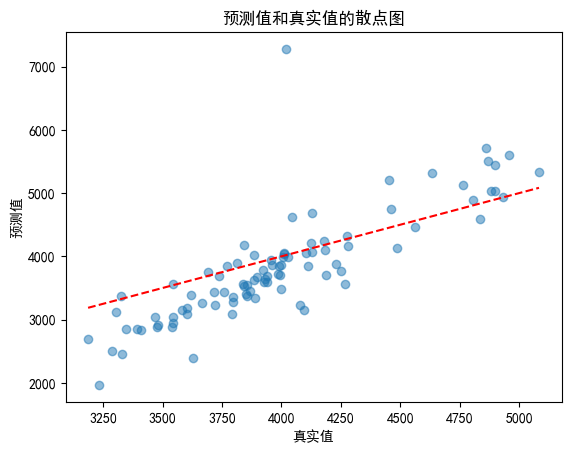

In [45]:
plt.scatter(y_test, y_pred, alpha=0.5) # ÁªòÂà∂È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÁöÑÊï£ÁÇπÂõæ // y_test Ë°®Á§∫ÁúüÂÆûÂÄº, y_pred Ë°®Á§∫È¢ÑÊµãÂÄº
plt.xlabel("ÁúüÂÆûÂÄº") # Ê∑ªÂä† x ËΩ¥Ê†áÁ≠æ
plt.ylabel("È¢ÑÊµãÂÄº") # Ê∑ªÂä† y ËΩ¥Ê†áÁ≠æ
plt.title("È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÁöÑÊï£ÁÇπÂõæ") # Ê∑ªÂä†Ê†áÈ¢ò
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') # ÁªòÂà∂ÂØπËßíÁ∫ø
plt.show() # ÊòæÁ§∫ÂõæÂÉè

‰∏çÊòØ‰Ω†ËÆæÁΩÆÁöÑ üôÇÔºåÂá∫Áé∞ 10 ‰∏™ÁªìÊûúÊòØÂõ†‰∏∫ÊàëÂú®‰ª£Á†ÅÊúÄÂêéÂÜô‰∫ÜÔºö

```python
print(f'È¢ÑÊµãÁªìÊûúÔºàÈÉ®ÂàÜÔºâÔºö{y_pred[:10]}')
```

ËøôÈáåÁöÑ `y_pred[:10]` Âè™ÊòØ**Êà™ÂèñÈ¢ÑÊµãÁªìÊûúÁöÑÂâç 10 ‰∏™Ê†∑Êú¨**Êù•Â±ïÁ§∫ÔºåÊñπ‰æø‰Ω†Áúã„ÄÇ
ÂÆûÈôÖ‰∏ä `y_pred` ÈáåÈù¢ÁöÑÁªìÊûúÊï∞Èáè = ÊµãËØïÈõÜÁöÑÊ†∑Êú¨Êï∞Èáè (`X_test.shape[0]`)„ÄÇ

---

ÊâÄ‰ª•Ôºö

* Â¶ÇÊûú‰Ω†ÁöÑÊµãËØïÈõÜÊúâ 92 Â§©ÔºàÊØîÂ¶ÇÊÄªÂÖ± 460 Â§©ÔºåËÆ≠ÁªÉ 368 Â§©ÔºåÊµãËØï 92 Â§©ÔºâÔºåÈÇ£‰πà `y_pred` ÂÖ∂ÂÆûÂ∞±ÊòØ 92 ‰∏™È¢ÑÊµãÁªìÊûú„ÄÇ
* ÊàëÂè™ÊòØÁî®‰∫Ü `[:10]` ËÆ©ËæìÂá∫ÁÆÄÁü≠Ôºå‰∏çÁÑ∂‰∏ÄÈïø‰∏≤ÁªìÊûú‰ºöÂà∑Â±è„ÄÇ

---

Â¶ÇÊûú‰Ω†ÊÉ≥ÁúãÂà∞ÊâÄÊúâÈ¢ÑÊµãÂÄºÔºåÂèØ‰ª•Áõ¥Êé•ÊâìÂç∞Ôºö

```python
print(y_pred)
```

Â¶ÇÊûú‰Ω†Âè™ÊÉ≥È¢ÑÊµã**‰∏ã‰∏ÄÂ§©ÁöÑÊî∂Áõò‰ª∑**ÔºåÂ∞±‰∏çËÉΩÁõ¥Êé•Áî® `train_test_split`ÔºåÈúÄË¶ÅÂÜô‰∏Ä‰∏™„ÄåÊªëÂä®Á™óÂè£„ÄçÊàñËÄÖ„ÄåÈÄíÂΩíÈ¢ÑÊµã„ÄçÁöÑÊñπÊ≥ïÔºåËÆ©Ê®°ÂûãÊ†πÊçÆÊúÄËøëÂá†Â§©ÁöÑÁâπÂæÅÂéªÈ¢ÑÊµãÊú™Êù•‰∏ÄÂ§©„ÄÇ

Ë¶Å‰∏çË¶ÅÊàëÁªô‰Ω†ÂÜô‰∏Ä‰∏™„Äå‰∏ìÈó®È¢ÑÊµã‰∏ã‰∏ÄÂ§©Êî∂Áõò‰ª∑„ÄçÁöÑÁ•ûÁªèÁΩëÁªúÁâàÊú¨Ôºü


ÂæàÂ•ΩÔºåËøôÈáåÊàë‰ª¨Â∞±Êää„ÄåÊÄùË∑Ø„ÄçËÆ≤Ê∏ÖÊ•öÔºö‰∏∫‰ªÄ‰πàÁé∞Âú®ÁöÑ‰ª£Á†ÅÈ¢ÑÊµã‰∏ÄÂ§ßÂ†ÜÔºåËÄå‰Ω†ÊÉ≥Ë¶ÅÁöÑÊòØ‚Äú‰∏ã‰∏ÄÂ§©Êî∂Áõò‰ª∑‚Äù„ÄÇ

---

### 1. ‰∏∫‰ªÄ‰πàÁé∞Âú®ÊòØÂ§ö‰∏™È¢ÑÊµãÂÄºÔºü

Âõ†‰∏∫‰Ω†Áî®‰∫Ü `train_test_split`Ôºö

* ÂÆÉÊääÊï∞ÊçÆÂàÜÊàêËÆ≠ÁªÉÈõÜÔºàÊØîÂ¶Ç 80%ÔºâÂíåÊµãËØïÈõÜÔºà20%Ôºâ„ÄÇ
* Ê®°ÂûãËÆ≠ÁªÉÂ•ΩÂêéÔºåÂØπ**ÊµãËØïÈõÜÈáåÁöÑÊâÄÊúâÊ†∑Êú¨**ÈÉΩËøõË°åÈ¢ÑÊµã„ÄÇ
  ÊâÄ‰ª•È¢ÑÊµãÁªìÊûúËá™ÁÑ∂ÊúâÂá†ÂçÅ‰∏™„ÄÅ‰∏äÁôæ‰∏™„ÄÇ

---

### 2. Â¶ÇÊûúÂè™ÊÉ≥È¢ÑÊµã„Äå‰∏ã‰∏ÄÂ§©Êî∂Áõò‰ª∑„ÄçËØ•ÊÄé‰πàÂÅöÔºü

Ë¶ÅËÆ©Ê®°ÂûãÂ≠¶‰ºö‚ÄúÊ†πÊçÆËøáÂéªÁöÑÊï∞ÊçÆÈ¢ÑÊµãÊú™Êù•‚ÄùÔºåÊÄùË∑ØÊòØËøôÊ†∑ÁöÑÔºö

**Ê†∏ÂøÉÔºöÊªëÂä®Á™óÂè£ÔºàWindowÔºâ**

* Áî®ÊúÄËøë N Â§©ÁöÑÁâπÂæÅ ‚Üí È¢ÑÊµãÁ¨¨ N+1 Â§©ÁöÑÊî∂Áõò‰ª∑„ÄÇ
* ‰æãÂ¶ÇÔºö

  * ËæìÂÖ•Ôºö\[3900, 3910, 3920] ‚Üí ËæìÂá∫Ôºö3930
  * ËæìÂÖ•Ôºö\[3910, 3920, 3930] ‚Üí ËæìÂá∫Ôºö3940

ËøôÊ†∑Ê®°ÂûãÂ≠¶ÁöÑÂ∞±ÊòØ„ÄåËøûÁª≠Êó∂Èó¥Â∫èÂàó„ÄçÁöÑËßÑÂæã„ÄÇ

---

### 3. ÂÆûÁé∞Ê≠•È™§

1. **ÂáÜÂ§áÊï∞ÊçÆ**
   ÊääÂéüÂßãÊî∂Áõò‰ª∑Â∫èÂàó `[3911, 4006, 3996, 4007, ‚Ä¶]` ËΩ¨Êç¢Êàê„ÄåËæìÂÖ•Á™óÂè£ + ËæìÂá∫„ÄçÂØπ„ÄÇ

   * ËæìÂÖ•Á™óÂè£Â§ßÂ∞èÂèØ‰ª•ËÆæ 5 Â§©„ÄÅ10 Â§©Á≠â„ÄÇ
   * ‰æãÂ¶ÇÁ™óÂè£Â§ßÂ∞è = 5Ôºö

     * X1 = \[3911, 4006, 3996, 4007, 4010]Ôºåy1 = 4020
     * X2 = \[4006, 3996, 4007, 4010, 4020]Ôºåy2 = 4035

2. **ÂàíÂàÜËÆ≠ÁªÉÂíåÊµãËØïÈõÜ**
   ‰∏çÁî® `train_test_split` ÈöèÊú∫ÂàíÂàÜÔºåËÄåÊòØÁî®**Ââç 80% Êó∂Èó¥ÂÅöËÆ≠ÁªÉÔºåÊúÄÂêé 20% Êó∂Èó¥ÂÅöÊµãËØï**„ÄÇ
   Âõ†‰∏∫Êó∂Èó¥Â∫èÂàó‰∏çËÉΩ‰π±Êâì‰π±„ÄÇ

3. **Âª∫Ê®°**

   * ÂèØ‰ª•Áî®Á•ûÁªèÁΩëÁªúÔºàMLPRegressor Êàñ keras/tfÔºâ
   * ËæìÂÖ•ÊòØ„ÄåËøáÂéª N Â§©ÁöÑÊî∂Áõò‰ª∑„ÄçÔºåËæìÂá∫ÊòØ„Äå‰∏ã‰∏ÄÂ§©Êî∂Áõò‰ª∑„Äç„ÄÇ

4. **È¢ÑÊµã**

   * Ê®°ÂûãËÆ≠ÁªÉÂ•Ω‰ª•ÂêéÔºåÊääÊúÄËøë N Â§©ÁöÑÊî∂Áõò‰ª∑‰Ωú‰∏∫ËæìÂÖ•ÔºåÈ¢ÑÊµãÊú™Êù• 1 Â§©„ÄÇ
   * Â¶ÇÊûúÊÉ≥È¢ÑÊµãÂ§öÂ§©ÔºåÂ∞±Áî®„ÄåÈÄíÂΩíÈ¢ÑÊµã„ÄçÔºöÈ¢ÑÊµãÊòéÂ§© ‚Üí ÊääÈ¢ÑÊµãÂÄºÂä†Âà∞Êï∞ÊçÆÈáå ‚Üí È¢ÑÊµãÂêéÂ§© ‚Üí ‚Ä¶

---

### 4. Êï¥‰ΩìÈÄªËæëÂõæ

```
ÂéüÂßãÂ∫èÂàó: [3911, 4006, 3996, 4007, 4010, 4020, ‚Ä¶]

‚Üì ÊûÑÈÄ†Á™óÂè£
X = [[3911, 4006, 3996, 4007, 4010],
     [4006, 3996, 4007, 4010, 4020],
     ...]
y = [4020, 4035, ‚Ä¶]

‚Üì ËÆ≠ÁªÉÊ®°Âûã
ËæìÂÖ•: X (ËøáÂéªNÂ§©) ‚Üí ËæìÂá∫: y (‰∏ã‰∏ÄÂ§©)

‚Üì È¢ÑÊµã
ÊúÄËøëNÂ§©ËæìÂÖ•Ê®°Âûã ‚Üí È¢ÑÊµãÊú™Êù•Êî∂Áõò‰ª∑
```

---

Ë¶Å‰∏çË¶ÅÊàëÂ∏Æ‰Ω†ÂÜô‰∏Ä‰∏™**ÊªëÂä®Á™óÂè£+Á•ûÁªèÁΩëÁªú**ÁöÑÂÆåÊï¥‰ª£Á†ÅÔºå‰Ω†Âè™Ë¶ÅÊää‰Ω†ÁöÑÊî∂Áõò‰ª∑ `df['close']` Â°ûËøõÂéªÔºåÂ∞±ËÉΩÁõ¥Êé•Ë∑ëÂá∫Êù•È¢ÑÊµã„Äå‰∏ã‰∏ÄÂ§©Êî∂Áõò‰ª∑„ÄçÔºü


In [3]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor          # MLP Â§öÂ±ÇÊÑüÁü•Êú∫ÂõûÂΩíÂô®
from sklearn.metrics import mean_squared_error, r2_score # ÂùáÊñπËØØÂ∑ÆÔºåR2 Á≥ªÊï∞

df = pd.read_csv('./Ê≤™Ê∑±300-460_date.csv')

# Â∞ÜÊó•ÊúüËΩ¨Êç¢‰∏∫Êó∂Èó¥Êà≥
df['date'] = pd.to_datetime(df['date']) # Â∞ÜÊó•ÊúüÂàóËΩ¨Êç¢‰∏∫Êó•ÊúüÊó∂Èó¥Ê†ºÂºè
df['date'] = df['date'].map(pd.Timestamp.toordinal) # toordinal() Â∞ÜÊó•ÊúüËΩ¨Êç¢‰∏∫Êó∂Èó¥Êà≥

# print(df.head())

# ========= 1. ÊûÑÈÄ†Êï∞ÊçÆ =========
# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÊúâÊî∂Áõò‰ª∑Â∫èÂàó
# ‰æãÂ¶ÇÔºödf = pd.read_csv('Ê≤™Ê∑±300.csv')
# Êî∂Áõò‰ª∑ÊîæÂú® close Âàó
close_prices = df['close'].values
# print(close_prices)

# ÊªëÂä®Á™óÂè£Â§ßÂ∞èÔºàÊØîÂ¶ÇÁî®ËøáÂéª 5Â§© È¢ÑÊµãÁ¨¨ 6Â§©Ôºâ
windows_size = 5

X, y = [], []
for i in range(len(close_prices) - windows_size):
    X.append(close_prices[i:i+windows_size]) # ËæìÂÖ•ÔºöËøáÂéª 5Â§©
    y.append(close_prices[i+windows_size]) # ËæìÂá∫ÔºöÁ¨¨ 6Â§©


# ËΩ¨Êç¢‰∏∫numpyÊï∞ÁªÑÁî®‰∫éËÆ≠ÁªÉ
X = np.array(X)
y = np.array(y)

# ========= 2. ÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜ =========
# Áî®Ââç 80% split ËÆ≠ÁªÉÈõÜÔºåÂêé 20% ÊµãËØïÈõÜ
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

# ========= 3. Âª∫Á´ãÁ•ûÁªèÁΩëÁªúÊ®°Âûã =========
model = MLPRegressor(
    hidden_layer_sizes=(64, 32), # ‰∏§Â±ÇÈöêËóèÂ±ÇÔºåÊØèÂ±Ç 64 ‰∏™Á•ûÁªèÂÖÉÔºå32 ‰∏™Á•ûÁªèÂÖÉÔºåËæìÂÖ•Â±Ç64 ËæìÂá∫Â±Ç32
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    verbose=True # ÊòæÁ§∫ËÆ≠ÁªÉËøáÁ®ã
)
print(model) # Êü•ÁúãÊ®°ÂûãÂèÇÊï∞

# ËÆ≠ÁªÉ
model.fit(X_train, y_train)

# ========= 4. ÊµãËØïÈõÜËØÑ‰º∞ =========
y_pred = model.predict(X_test) # Áî®ÊµãËØïÈõÜËæìÂÖ•È¢ÑÊµãËæìÂá∫

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'ÂùáÊñπËØØÂ∑Æ: {mse:.2f}')
print(f'R2 Á≥ªÊï∞: {r2:.4f}')

# ========= 5. È¢ÑÊµãÊú™Êù•‰∏ÄÂ§© =========
last_window = close_prices[-windows_size:] # ÊúÄËøëÁöÑ 5 Â§©
next_day_pred = model.predict([last_window])
print(f'È¢ÑÊµã‰∏ã‰∏ÄÂ§©ÁöÑÈ¢ÑÊµãÊî∂Áõò‰ª∑: {next_day_pred[0]:.2f}')

# print(y_test, y_pred) # Êü•ÁúãÊµãËØïÈõÜÁöÑÁúüÂÆûÂÄºÂíåÈ¢ÑÊµãÂÄº


364 91
364 91
MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42,
             verbose=True)
Iteration 1, loss = 6623150.27718970
Iteration 2, loss = 5683819.74843681
Iteration 3, loss = 4840240.95648641
Iteration 4, loss = 4077134.47699016
Iteration 5, loss = 3501504.94184522
Iteration 6, loss = 3038340.88855604
Iteration 7, loss = 2639779.63986517
Iteration 8, loss = 2260414.39220743
Iteration 9, loss = 1926478.25073614
Iteration 10, loss = 1625231.20208631
Iteration 11, loss = 1352472.52679318
Iteration 12, loss = 1108848.95637189
Iteration 13, loss = 893802.93839839
Iteration 14, loss = 707224.43781987
Iteration 15, loss = 565325.34933557
Iteration 16, loss = 444150.78699448
Iteration 17, loss = 342886.73542210
Iteration 18, loss = 258577.67570186
Iteration 19, loss = 187416.02759650
Iteration 20, loss = 128647.91325167
Iteration 21, loss = 87660.59678560
Iteration 22, loss = 65544.77428356
Iteration 23, loss = 58107.58205564
Iteration 24, loss = 62851.9842762

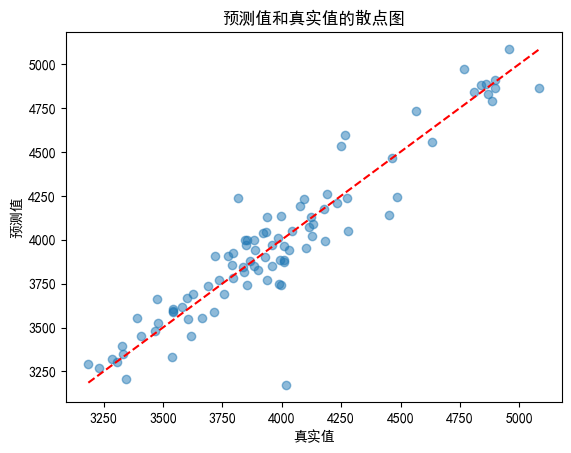

In [68]:
plt.scatter(y_test, y_pred, alpha=0.5) # ÁªòÂà∂È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÁöÑÊï£ÁÇπÂõæ // y_test Ë°®Á§∫ÁúüÂÆûÂÄº, y_pred Ë°®Á§∫È¢ÑÊµãÂÄº
plt.xlabel("ÁúüÂÆûÂÄº") # Ê∑ªÂä† x ËΩ¥Ê†áÁ≠æ
plt.ylabel("È¢ÑÊµãÂÄº") # Ê∑ªÂä† y ËΩ¥Ê†áÁ≠æ
plt.title("È¢ÑÊµãÂÄºÂíåÁúüÂÆûÂÄºÁöÑÊï£ÁÇπÂõæ") # Ê∑ªÂä†Ê†áÈ¢ò
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') # ÁªòÂà∂ÂØπËßíÁ∫ø
plt.show() # ÊòæÁ§∫ÂõæÂÉè

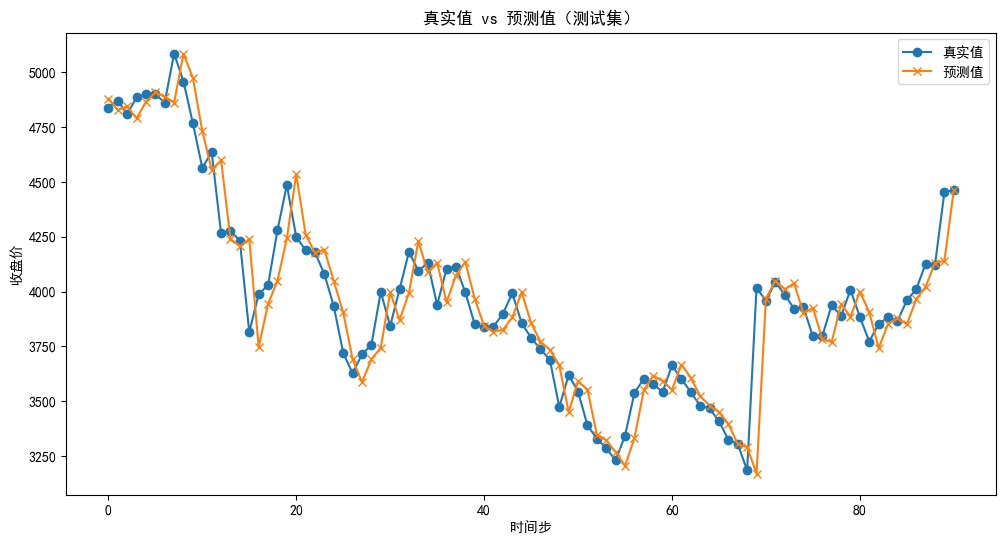

In [69]:
import matplotlib.pyplot as plt

# ‰∏≠ÊñáÊòæÁ§∫
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,6))
plt.plot(y_test, label='ÁúüÂÆûÂÄº', marker='o')
plt.plot(y_pred, label='È¢ÑÊµãÂÄº', marker='x')
plt.title("ÁúüÂÆûÂÄº vs È¢ÑÊµãÂÄºÔºàÊµãËØïÈõÜÔºâ")
plt.xlabel("Êó∂Èó¥Ê≠•")
plt.ylabel("Êî∂Áõò‰ª∑")
plt.legend()
plt.show()


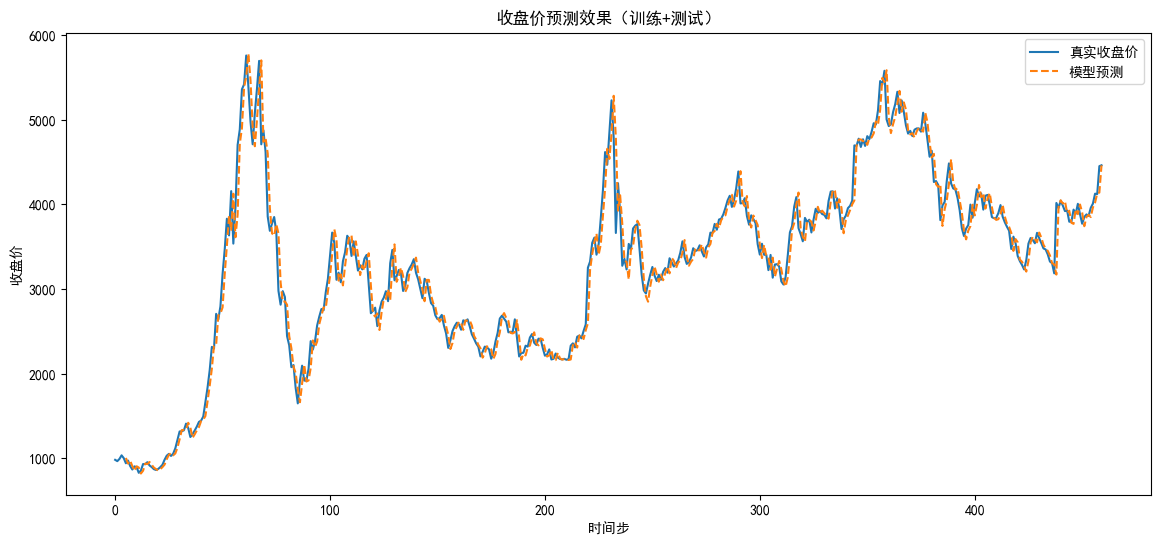

In [70]:
# ÊãºÊé•È¢ÑÊµãÁªìÊûú
all_pred = np.empty(len(close_prices))
all_pred[:] = np.nan   # ÂÖàÂ°´ÂÖÖÁ©∫ÂÄº
all_pred[window_size:] = model.predict(X)  # ‰ªéÁ¨¨ window_size Â§©ÂºÄÂßãÊâçÊúâÈ¢ÑÊµã

plt.figure(figsize=(14,6))
plt.plot(close_prices, label="ÁúüÂÆûÊî∂Áõò‰ª∑")
plt.plot(all_pred, label="Ê®°ÂûãÈ¢ÑÊµã", linestyle="--")
plt.title("Êî∂Áõò‰ª∑È¢ÑÊµãÊïàÊûúÔºàËÆ≠ÁªÉ+ÊµãËØïÔºâ")
plt.xlabel("Êó∂Èó¥Ê≠•")
plt.ylabel("Êî∂Áõò‰ª∑")
plt.legend()
plt.show()


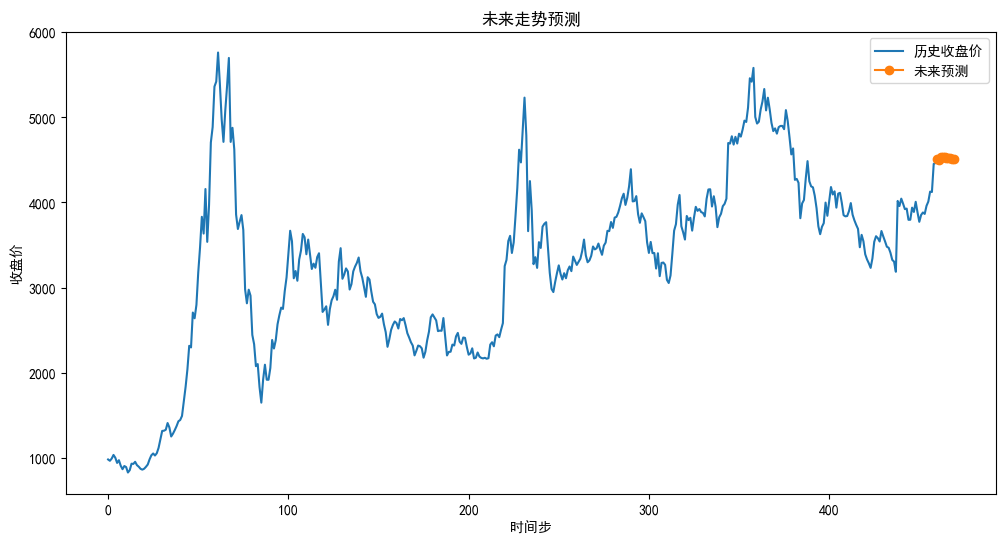

In [71]:
future_days = 10  # È¢ÑÊµãÊú™Êù•10Â§©
future_preds = []

last_window = close_prices[-window_size:].copy()
for _ in range(future_days):
    pred = model.predict([last_window])[0]
    future_preds.append(pred)
    # Êõ¥Êñ∞Á™óÂè£Ôºö‰∏¢ÊéâÊúÄÊó©‰∏ÄÂ§©ÔºåÂä†‰∏äÈ¢ÑÊµãÂÄº
    last_window = np.append(last_window[1:], pred)

# ÂèØËßÜÂåñÔºöÂéÜÂè≤ + Êú™Êù•È¢ÑÊµã
plt.figure(figsize=(12,6))
plt.plot(range(len(close_prices)), close_prices, label="ÂéÜÂè≤Êî∂Áõò‰ª∑")
plt.plot(range(len(close_prices), len(close_prices)+future_days),
         future_preds, label="Êú™Êù•È¢ÑÊµã", marker="o")
plt.title("Êú™Êù•Ëµ∞ÂäøÈ¢ÑÊµã")
plt.xlabel("Êó∂Èó¥Ê≠•")
plt.ylabel("Êî∂Áõò‰ª∑")
plt.legend()
plt.show()
